# TAREA 4

## Punto 1

Se encuentra adjunto en la carpeta en el archivo: Tarea_4

## Punto 2

In [57]:
import sympy as sym

def BaseLagrange(x, xi, j):
    prod = 1.0
    n = len(xi)
    for i in range(n):
        if i != j:
            prod *= (x - xi[i]) / (xi[j] - xi[i])
    return prod
            
def interpolar_y_integrar(t, valores_t, valores_f):
    n = len(valores_t)
    polinomio = sum(valores_f[j] * BaseLagrange(t, valores_t, j) for j in range(n))
    integral = sym.integrate(polinomio, (t, 0, h))
    return integral

h, t, tn = sym.symbols("h t t_n", real=True)
t_3 = [-2 * h, -h, 0]
f1, f2, f3 = sym.symbols("f_n f_n-1 f_n-2", real=True)
fs_3 = [f3, f2, f1]

I_3 = interpolar_y_integrar(t, t_3, fs_3)
I_3 = sym.nsimplify(I_3, tolerance=0.000000000001)
I_3 = sym.simplify(I_3)
t_4 = [-3 * h, -2 * h, -h, 0]
f1, f2, f3, f4 = sym.symbols("f_n f_n-1 f_n-2 f_n-3", real=True)
fs_4 = [f4, f3, f2, f1]

I_4 = interpolar_y_integrar(t, t_4, fs_4)
I_4 = sym.nsimplify(I_4, tolerance=0.000000000001)
I_4 = sym.simplify(I_4)
print("Solución para tres puntos usando interpolación y Adams-Bashforth:", I_3)
print("Solución para cuatro puntos usando interpolación y Adams-Bashforth:", I_4)



Solución para tres puntos usando interpolación y Adams-Bashforth: h*(23*f_n - 16*f_n-1 + 5*f_n-2)/12
Solución para cuatro puntos usando interpolación y Adams-Bashforth: h*(55*f_n - 59*f_n-1 + 37*f_n-2 - 9*f_n-3)/24


## Punto 3

In [58]:
import sympy as sym

h, t, fn, fn1, fn2, fn3 = sym.symbols('h t fn fn1 fn2 fn3')
t_3 = [-h, 0, h]
t_4 = [-2*h, -h, 0, h]
fs_3 = [fn2, fn, fn1]
fs_4 = [fn3, fn2, fn, fn1]

def interpolar(t_valores, f_valores, fn):
    n = len(t_valores)
    polinomio = 0
    for j in range(n):
        L = 1
        for i in range(n):
            if i != j:
                L *= (t - t_valores[i]) / (t_valores[j] - t_valores[i])
        polinomio += f_valores[j] * L
    return polinomio

poli_3 = interpolar(t_3, fs_3, fn)
poli_4 = interpolar(t_4, fs_4, fn)
integral_3 = sym.integrate(poli_3, (t, 0, h))
integral_4 = sym.integrate(poli_4, (t, 0, h))
integral_3 = sym.simplify(integral_3)
integral_4 = sym.simplify(integral_4)

print("Solución para tres puntos usando Adams-Moulton:")
print(integral_3)
print("\nSolución para cuatro puntos usando Adams-Moulton:")
print(integral_4)


Solución para tres puntos usando Adams-Moulton:
h*(8*fn + 5*fn1 - fn2)/12

Solución para cuatro puntos usando Adams-Moulton:
h*(19*fn + 9*fn1 - 5*fn2 + fn3)/24


## Punto 4

In [59]:
def determinante_del_jacobiano(dt):
    J = [[1, dt],
         [0, 1]]
    det_J = J[0][0] * J[1][1] - J[0][1] * J[1][0]
    
    return det_J

dt = 0.1
det_J = determinante_del_jacobiano(dt)
tolerancia = 1e-10

if abs(det_J - 1) < tolerancia:
    print("El método es simpléctico: El determinante del Jacobiano es igual a uno.")
else:
    print("El método de Verlet no es simpléctico: El determinante del Jacobiano no es igual a uno.")


El método es simpléctico: El determinante del Jacobiano es igual a uno.


## Punto 5

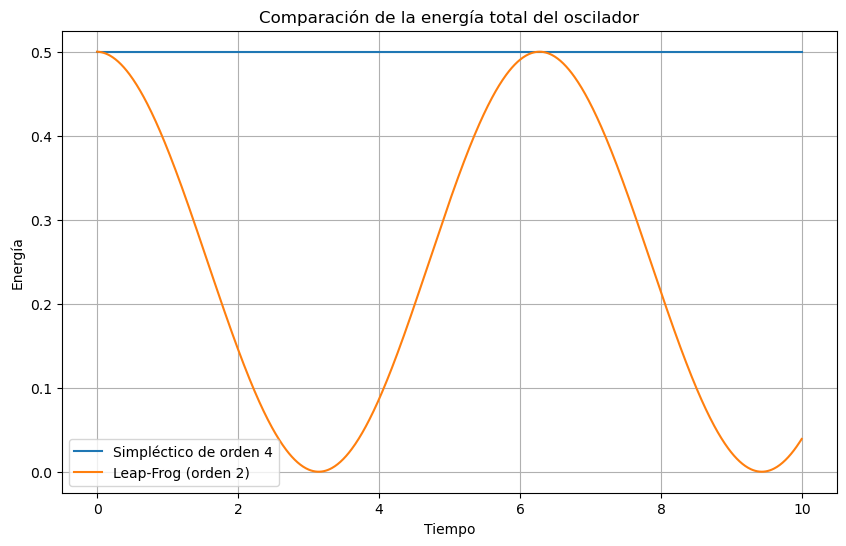

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def oscilador_armonico(x, v):
    return v, -x

def metodo_simpléctico_4to_orden(x0, v0, dt, t_max):
    t = np.arange(0, t_max, dt)
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0] = x0
    v[0] = v0    
    for i in range(1, len(t)):
        k1x, k1v = oscilador_armonico(x[i-1], v[i-1])
        k2x, k2v = oscilador_armonico(x[i-1] + 0.5 * dt * k1x, v[i-1] + 0.5 * dt * k1v)
        k3x, k3v = oscilador_armonico(x[i-1] + 0.5 * dt * k2x, v[i-1] + 0.5 * dt * k2v)
        k4x, k4v = oscilador_armonico(x[i-1] + dt * k3x, v[i-1] + dt * k3v)
        
        x[i] = x[i-1] + (dt / 6) * (k1x + 2*k2x + 2*k3x + k4x)
        v[i] = v[i-1] + (dt / 6) * (k1v + 2*k2v + 2*k3v + k4v)    
    return t, x, v

def leap_frog(x0, v0, dt, t_max, amplitud):
    t = np.arange(0, t_max, dt)
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0] = x0
    v[0] = v0    
    for i in range(1, len(t)):
        v[i] = v[i-1] - dt * (x[i-1] - amplitud)  
        x[i] = x[i-1] + dt * v[i]    
    return t, x, v

x0 = 1  
v0 = 0  
dt = 0.01  
t_max = 10  

t_leap_frog, x_leap_frog, v_leap_frog = leap_frog(x0, v0, dt, t_max, amplitud=0.5) 
t_symplectic, x_symplectic, v_symplectic = metodo_simpléctico_4to_orden(x0, v0, dt, t_max)

energia_symplectic = 0.5 * v_symplectic**2 + 0.5 * x_symplectic**2
energia_leap_frog = 0.5 * v_leap_frog**2 + 0.5 * x_leap_frog**2

plt.figure(figsize=(10, 6))
plt.plot(t_symplectic, energia_symplectic, label='Simpléctico de orden 4')
plt.plot(t_leap_frog, energia_leap_frog, label='Leap-Frog (orden 2)')
plt.xlabel('Tiempo')
plt.ylabel('Energía')
plt.title('Comparación de la energía total del oscilador')
plt.legend()
plt.grid(True)
plt.show()


## Punto 6

### A)

la ecuación diferencial de segundo orden:

\begin{equation}
\frac{d^2 y}{dx^2} - R(x)y = S(x), \quad 
\end{equation}

$y(a) = y_a$ y $y(b) = y_b$, donde $R(x)$ función real y $S(x)$ término inhomogéneo.

Discretizamos el dominio y expandimos $y(x \pm h)$ hasta $O(h^6)$ para obtener:

\begin{equation}
y_{n+1} - 2y_n + y_{n-1} = \left(y_n'' + \frac{h^2}{12} y_n^{IV} \right)h^2 + O(h^6). \quad 
\end{equation}

Escribo la ecuación de Numerov:

\begin{align}
&\left(1 - \frac{h^2}{12} R_{n+1}\right) y_{n+1} - 2 \left(1 + \frac{5h^2}{12} R_n \right) y_n + \left(1 - \frac{h^2}{12} R_{n-1}\right) y_{n-1} \nonumber \\
&= \frac{h^2}{12} (S_{n+1} + 10S_n + S_{n-1}) + O(h^6). \quad \text{(3.114)}
\end{align}

condiciones de borde $y(a) = y_a$ y $y(a + h) = y_a + 1 \times 10^{-5}$.


### Demas)

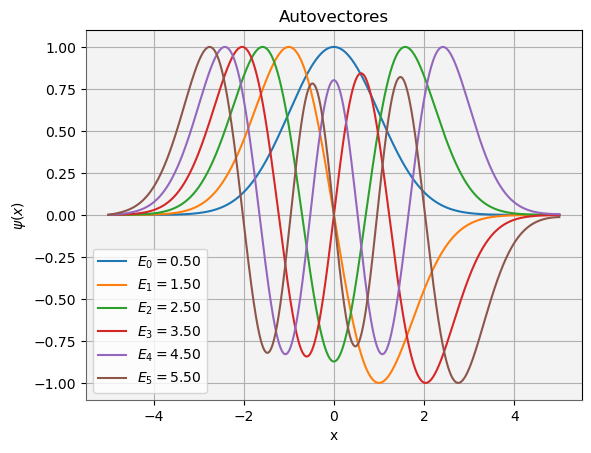

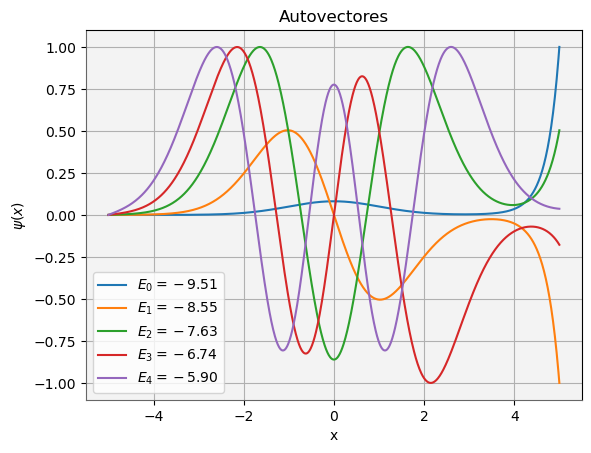

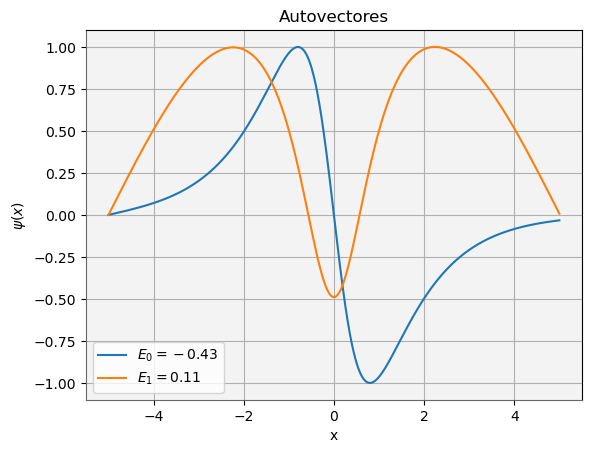

In [78]:
import numpy as np
import matplotlib.pyplot as plt

h_barra = 1 
masa = 1     
frecuencia = 1 

def potencial_armonico(x):
    return 0.5 * masa * frecuencia**2 * x**2

def integracion_numerov(x_grilla, energia, funcion_potencial):
    k = (2 * masa / h_barra**2) * (funcion_potencial(x_grilla) - energia)
    psi = np.zeros_like(x_grilla)
    psi[1] = 1e-5  

    h = x_grilla[1] - x_grilla[0]  

    for i in range(1, len(x_grilla) - 1):
        b = 2 * (1 + 5 * h**2 * k[i] / 12) * psi[i]
        c = (1 - h**2 * k[i - 1] / 12) * psi[i - 1]
        d = 1 - h**2 * k[i + 1] / 12
        psi[i + 1] = (b - c) / d
    return psi



def encontrar_niveles_energeticos(x_grilla, funcion_potencial, rango_energia, dE=0.001, max_niveles=6):
    niveles_encontrados = []
    for energia in rango_energia:
        psi_final = integracion_numerov(x_grilla, energia, funcion_potencial)[-1]
        psi_siguiente_final = integracion_numerov(x_grilla, energia + dE, funcion_potencial)[-1]
        if psi_final * psi_siguiente_final < 0:
            niveles_encontrados.append(energia)
            if len(niveles_encontrados) == max_niveles:
                break
    return niveles_encontrados

def graficar_autovectores(x_grilla, niveles_energeticos, funcion_potencial):
    for i, E in enumerate(niveles_energeticos):
        psi = integracion_numerov(x_grilla, E, funcion_potencial)
        plt.plot(x_grilla, psi / np.max(np.abs(psi)), label=f"$E_{i} = {E:.2f}$")

    plt.xlabel("x")
    plt.ylabel("$\psi(x)$")
    plt.legend()
    plt.title("Autovectores")
    plt.grid(True)
    plt.gca().set_facecolor('#f3f3f3')  
    plt.gca().spines['bottom'].set_color('#666666')  
    plt.gca().spines['left'].set_color('#666666')  
    plt.show()

x_intervalo = np.linspace(-5, 5, 1000)

energias_armonicas = encontrar_niveles_energeticos(x_intervalo, potencial_armonico, np.arange(0, 6, 0.5))
graficar_autovectores(x_intervalo, energias_armonicas, potencial_armonico)

potencial_gaussiano = lambda x: -10 * np.exp(-x**2 / 20)
energias_gaussianas = encontrar_niveles_energeticos(x_intervalo, potencial_gaussiano, np.arange(-10, -5.5, 0.001), max_niveles=5)
graficar_autovectores(x_intervalo, energias_gaussianas, potencial_gaussiano)

def potencial_racional(x):
    return -4 / (1 + x**2)**2

energias_racionales = encontrar_niveles_energeticos(x_intervalo, potencial_racional, np.arange(-2, 1, 0.001), max_niveles=2)
graficar_autovectores(x_intervalo, energias_racionales, potencial_racional)

## Punto 7

In [62]:
import numpy as np
from scipy.optimize import fsolve

r_B = np.array([1, 3.0717794])
g = 9.81

def ecuaciones(vars):
    v0, theta = vars
    v0x = v0 * np.cos(np.deg2rad(theta))
    v0y = v0 * np.sin(np.deg2rad(theta))
    y = v0y * (2200) - 0.5 * g * (2200)**2
    x = v0x * (2200)
    eq1 = x - r_B[0]
    eq2 = y - r_B[1]
    
    return [eq1, eq2]

v0_estimado = 5000  
theta_estimado = 45  
v0, theta = fsolve(ecuaciones, [v0_estimado, theta_estimado])

print("Velocidad inicial (m/s):", v0)
print("Ángulo (grados):", theta)


Velocidad inicial (m/s): 10791.00139625951
Ángulo (grados): 89.99999758652352


## Punto 8

### A)

In [73]:
import numpy as np
from scipy.optimize import fsolve
T01 = 400  
T02 = 200  
L = 0.3  
L1 = L / 3  
L2 = L - L1 
k = 389.6 
A = 0.01  
def equilibrium_temperature(T):
    q = k * A * (T01 - T02) / L * (T01 - T) / L1
    return q
T_equilibrium = fsolve(equilibrium_temperature, T02)

print("La temperatura de equilibrio en la sección derecha es:", T_equilibrium[0], "K")


La temperatura de equilibrio en la sección derecha es: 400.0 K


### B)

In [76]:
R = 8.314  
cv = 3/2 * R  
ncv = 1  
T01 = 400  
T02 = 200 
L_total = 0.30  
A = 0.01 
k = 389.6 

C = k * A / (ncv * cv * L_total)

dT1_dt_0 = -C * (T01 - T02)
dT2_dt_0 = C * (T01 - T02)

print("dT1/dt en t=0:", dT1_dt_0, "K/s")
print("dT2/dt en t=0:", dT2_dt_0, "K/s")


dT1/dt en t=0: -208.26985272498865 K/s
dT2/dt en t=0: 208.26985272498865 K/s


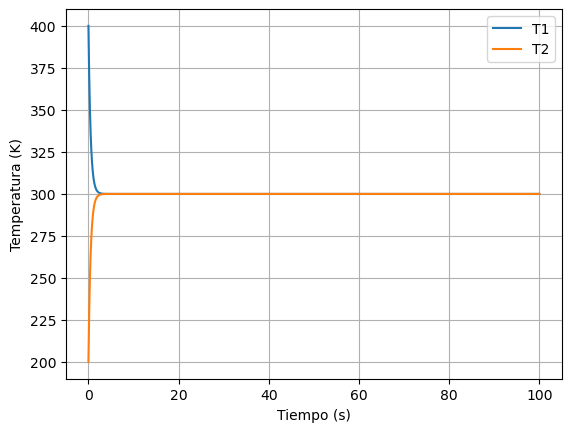

In [77]:
import numpy as np
import matplotlib.pyplot as plt
R = 8.314  
cv = 3/2 * R  
ncv = 1 
T01 = 400 
T02 = 200  
L_total = 0.30  
A = 0.01  
k = 389.6  
C = k * A / (ncv * cv * L_total)
dt = 0.01
total_time = 100
num_steps = int(total_time / dt)
T1_values = np.zeros(num_steps)
T2_values = np.zeros(num_steps)
T1_values[0] = T01
T2_values[0] = T02
for i in range(1, num_steps):
    dT1_dt = -C * (T1_values[i-1] - T2_values[i-1])
    dT2_dt = C * (T1_values[i-1] - T2_values[i-1])

    T1_values[i] = T1_values[i-1] + dT1_dt * dt
    T2_values[i] = T2_values[i-1] + dT2_dt * dt
plt.plot(np.linspace(0, total_time, num_steps), T1_values, label='T1')
plt.plot(np.linspace(0, total_time, num_steps), T2_values, label='T2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (K)')
plt.legend()
plt.grid(True)
plt.show()
